In [1]:
# N.B. the following code is NOT properly documented
# These are quick examples of
# 1) a Leapfrog integrator
# 2) Using the scipy.integrate.solve_ivp() routine
from math import *
import numpy as np

In [2]:
# Total energy and force function for the
# Galactic orbit
def energy(x, v) :
    return (v[0]*v[0] + v[1]*v[1])*0.5 - 1.0/np.sqrt(1. + x[0]*x[0] + x[1]*x[1])

def force(x) :
    denom = (1. + x[0]*x[0] + x[1]*x[1])**1.5
    return [-x[0]/denom, -x[1]/denom]


In [3]:
dt = .4

x = [1.0, 0.0]
v = [0.0, .3]


In [4]:
# A simple "Drift-Kick-Drift" leapfrog implementation
t = 0.0
xp = [x[0]]
yp = [x[1]]
ep = [energy(x, v)]
while(t < 100000.0) :
    x[0] += 0.5*dt*v[0]
    x[1] += 0.5*dt*v[1]
    a = force(x)
    v[0] += dt*a[0]
    v[1] += dt*a[1]
    x[0] += 0.5*dt*v[0]
    x[1] += 0.5*dt*v[1]
    xp.append(x[0])
    yp.append(x[1])
    ep.append(energy(x,v))
    t += dt


In [5]:
xa = np.array(xp)
ya = np.array(yp)
ea = np.array(ep)


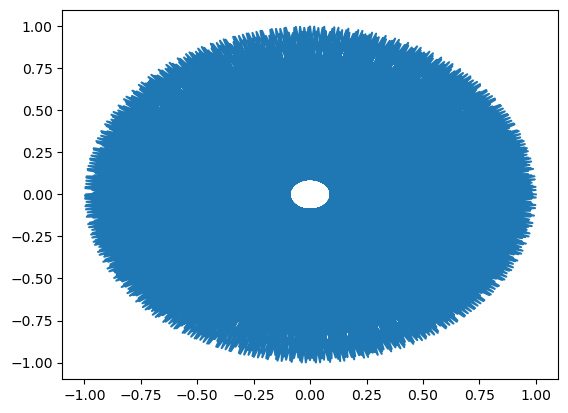

In [6]:
# Plotting every point is overkill; only plot every 100th point
import pylab as plt
plt.plot(xa[::100],ya[::100])

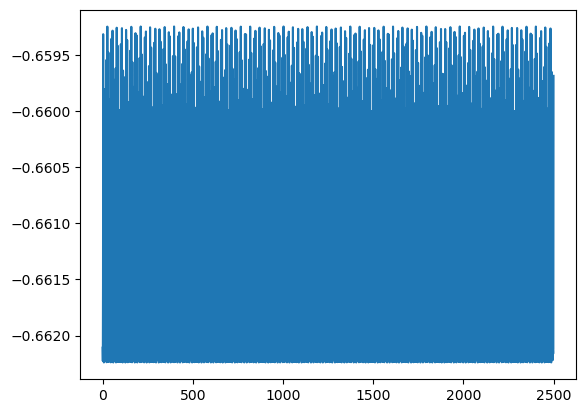

In [7]:
plt.plot(ea[::100])


In [8]:
import scipy.integrate as integ

In [9]:
# Use the above force function to implement a
# more general derivative fuction
def deriv(t, y) :
    # The first len/2 elements are positions
    # The second len/2 elements are velocities
    dof = len(y) // 2
    acc = force(y[:dof])
    v = y[dof:]
    return np.concatenate([v, acc])

In [10]:
dt = .4

x = np.array([1.0, 0.0])
v = np.array([0.0, .3])
y_0 = np.concatenate([x,v])

In [11]:
# Note that I am using solve_ivp()'s default parameters
# Even with the automatic error control it does very badly on
# long term energy conservation
t_end = 100000.0
t_eval = np.arange(0.0, t_end, 0.4)
soln = integ.solve_ivp(deriv, (0.0,t_end), y_0, t_eval=t_eval)

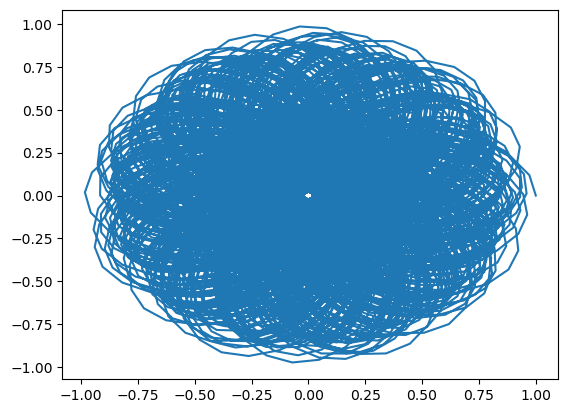

In [12]:
import pylab as plt
plt.plot(soln.y[0], soln.y[1])

In [13]:
ea = energy(soln.y[:2],soln.y[2:])


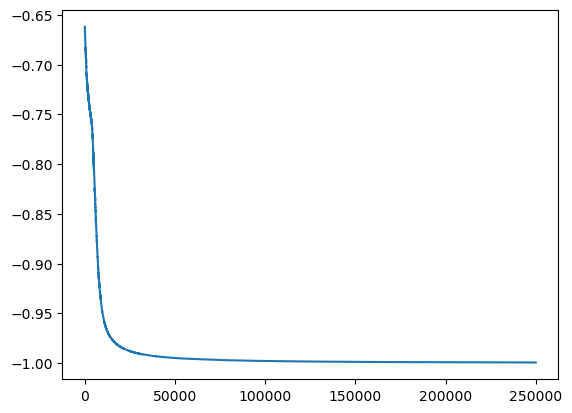

In [14]:
plt.plot(ea)